# Setup

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append(os.path.abspath('../'))
del sys, os

In [3]:
from database_creation.database import Database
from database_creation.article import Article
from database_creation.sentence import Sentence
from database_creation.coreference import Coreference
from database_creation.np import Np
from database_creation.token import Token
from database_creation.utils import BaseClass

# Processing the database

## Preprocessing

### Initializing the database

In [4]:
database = Database(max_size=None, threshold=5, project_root='../')


Initializing the database...

Cleaning the database...
Initial length of articles: 94497
Criterion: Check if an article's data is complete, ie if its annotation file exists.
Final length of articles: 68398
Done (elapsed time: 2s).

Done (elapsed time: 2s).



### Preprocessing the database

In [5]:
database.preprocess_database()


Preprocessing the database...

Computing the articles' metadata...
  article 1000/68398...
  article 2000/68398...
  article 3000/68398...
  article 4000/68398...
  article 5000/68398...
  article 6000/68398...
  article 7000/68398...
  article 8000/68398...
  article 9000/68398...
  article 10000/68398...
  article 11000/68398...
  article 12000/68398...
  article 13000/68398...
  article 14000/68398...
  article 15000/68398...
  article 16000/68398...
  article 17000/68398...
  article 18000/68398...
  article 19000/68398...
  article 20000/68398...
  article 21000/68398...
  article 22000/68398...
  article 23000/68398...
  article 24000/68398...
  article 25000/68398...
  article 26000/68398...
  article 27000/68398...
  article 28000/68398...
  article 29000/68398...
  article 30000/68398...
  article 31000/68398...
  article 32000/68398...
  article 33000/68398...
  article 34000/68398...
  article 35000/68398...
  article 36000/68398...
  article 37000/68398...
  article 38000/


Computing and displaying statistics...

Total number of tuples: 352239

10 most frequent tuples:
Al Gore|George Bush (in 2130 articles)
New York City|New York State (in 368 articles)
George Bush|John Mccain (in 368 articles)
New York Mets|New York Yankees (in 323 articles)
Hillary Clinton|Rick Lazio (in 318 articles)
Al Gore|Bill Clinton (in 301 articles)
Elian Gonzalez|Juan Gonzalez (in 231 articles)
Cuba|Miami (in 225 articles)
Al Gore|Katharine Seelye (in 198 articles)
Bill Clinton|George Bush (in 197 articles)

Done (elapsed time: 3s).



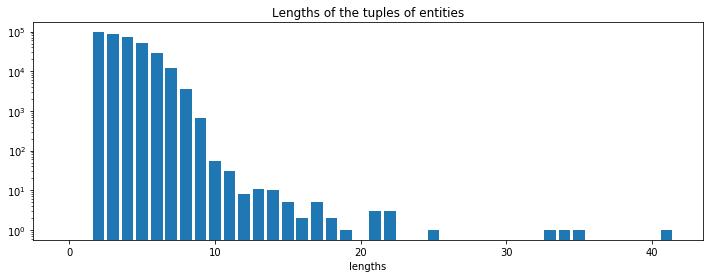

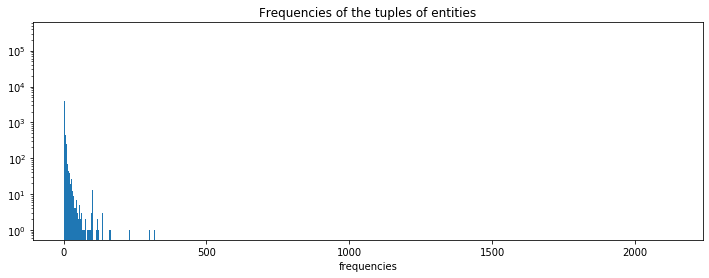

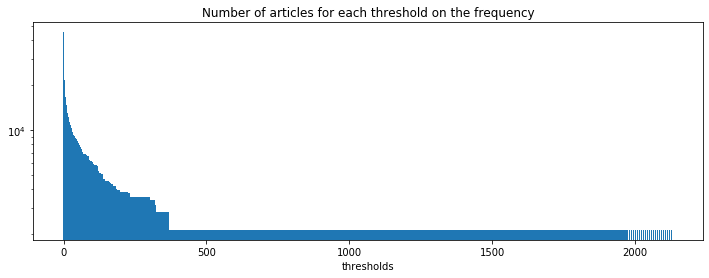

In [6]:
database.process_stats(type_='tuples')

In [7]:
database.filter_threshold()


Filtering the articles according to a threshold...
Initial length of tuples: 352239

Cleaning the database...
Initial length of articles: 45329
Criterion: Check if an article does not belong to the tuples ids.
Final length of articles: 18334
Done (elapsed time: 0s).

Final length of tuples: 4345
Done (elapsed time: 0s).



## Processing the database

### Computing the contexts of the articles

In [ ]:
database.preprocess_articles()


Preprocessing the articles...

Computing the articles' annotations...
  article 1000/18334...
  article 2000/18334...
  article 3000/18334...
  article 4000/18334...
  article 5000/18334...
  article 6000/18334...
  article 7000/18334...
  article 8000/18334...
  article 9000/18334...
  article 10000/18334...


In [ ]:
database.process_contexts()

In [ ]:
database.process_stats(type_='contexts')

### Computing the wikipedia information

In [ ]:
database.process_wikipedia(load=False)

In [ ]:
database.process_stats(type_='wikipedia')

### Computing the aggregation samples

In [ ]:
database.process_samples(load=False)

## Results

### Load existing samples

In [ ]:
database = Database(max_size=10000, threshold=3, project_root='../')
database.process_samples(load=True)

In [27]:
for sample in database.samples:
    print(Database.to_string(sample))
    print(Database.to_string(database.samples[sample]))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




88_1169192_38|39
Entities: Alan Keyes|George Bush
Alan Keyes: Alan Lee Keyes (born August 7, 1950) is an American  conservative political activist, pundit, author and former ambassador.
A doctoral graduate of Harvard University, Keyes began his diplomatic career in the U.S. Foreign Service in 1979 at the United States consulate in Bombay, India, and later in the American embassy in Zimbabwe.
Keyes was appointed Ambassador to the Economic and Social Council of the United Nations by President Ronald Reagan, and served as Reagan's Assistant Secretary of State for International Organization Affairs from 1985 to 1987; in his capacities as a UN ambassador, among Keyes's accomplishments was contributing to the Mexico City Policy.
Keyes ran for President of the United States in 1996, 2000, and 2008. He was the Republican nominee for the U.S. Senate in Maryland against Paul Sarbanes in 1988 and Barbara Mikulski in 1992, as well as in Illinois against Barack Obama in 2004. Keyes lost all three 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
database.display_tuple(0)

Entity tuples: George Bush|John Mccain




KeyError: ('George Bush', 'John Mccain')

In [19]:
database.display_tuple(1)

Entity tuples: Elian Gonzalez|Juan Gonzalez




KeyError: ('Elian Gonzalez', 'Juan Gonzalez')

In [ ]:
database.display_tuple(2)

In [ ]:
database.display_tuple(3)

In [ ]:
database.display_tuple(4)

In [ ]:
database.display_tuple(5)

In [ ]:
database.display_tuple(6)

In [ ]:
def display_tuple(self, idx):

    entity_tuple = self.tuples[idx]['tuple_']
    ids = self.tuples[idx]['ids']

    length = 0

    print("Entity tuples: {}\n\n".format(self.to_string(entity_tuple)))

    for id_ in ids:
        article = self.articles[id_]

        for type_ in article.contexts:
            contexts = article.contexts[type_][entity_tuple]
            length += len(contexts)

            print(self.to_string(contexts) + '\n\n')

    print("\n{} samples out of {} articles".format(length, len(ids)))